# Open CV & Image Analysis

Lets pursue understanding a image and video processesing library which will help preprocess data to feed into DNNS 
& accomplish CV tasks such as object detection, image classification among others!

This will also allow us to better understand the input features that we feed into CNNS

Resource:https://pythonprogramming.net/loading-images-python-opencv-tutorial/ <br>
CV2 Documentation: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

<h3> Lets go ahead and download and import opencv along with the other packages we will be using </h3>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h3> Importing & Showing Images </h3>

Note how the grayscale is one dimensional and the colored images are 3 as they should be RGB

In [2]:
# Import
gray_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_GRAYSCALE)
c_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_COLOR)

# You can show an image in different ways, example: matplotlib and via cv

# Via cv2
cv2.imshow('image', c_img)     # try shpwing gray_img as well  
cv2.waitKey(0)                 #just waits for any key to be pressed
cv2.destroyAllWindows()

cv2.imwrite('C:/Users/Darshil/Desktop/Dreams/save_watch.jpg', c_img)   #how to save an image 

True

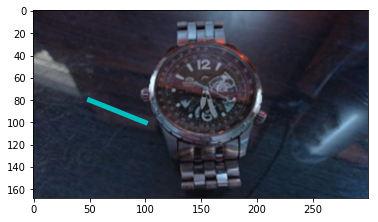

In [3]:
#via matplotlib
plt.imshow(c_img,cmap = 'gray', interpolation = 'bicubic')
plt.plot([50,100], [80,100], 'c', linewidth=5)     #plotting directly on the image!
plt.show()

# Loading Video Sources

Note that a video is simply image frames loaded in a certain second (FPS) - hence just a bunch of images really!

In [7]:
cap = cv2.VideoCapture(0)        #The 0 means it will use the first webcam. If you have one just use 0 obv
fourcc = cv2.VideoWriter_fourcc(*'XVID')       #Here we decide what type of video we're reading I think?
out = cv2.VideoWriter('output.avi', fourcc, 20.0,(640,480))    # Where to output and in what format


while True:
    ret, frame = cap.read()      # we read each frame of the video 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)     #
    out.write(frame)                                   # we write the file here
    cv2.imshow('gray', gray)
    
    if cv2.waitKey(0) == ord('q'):              #Remember that waitkey waits for you to press something and then exit
        break
        
cap.release()          # you release so that the camera is done using 
out.release()
cv2.destroyAllWindows()

# Drawing & Writing on Images

In [7]:
c_img = cv2.imread('C:/Users/Darshil/Desktop/Dreams/watch.jpg',cv2.IMREAD_COLOR)

"""
NOTE:
Remember that we refer to points in an image based on the dimensions and the coordinates which always start from (0,0) top left
and go down. then (0,0) bottom left and goes sideways. For RGB there are 3 channels
"""

# Lets draw some cool stuff on our image!
cv2.line(c_img, (0,50), (150,150), (255,255,255), 1)    #Here in the last parenthesis, we specific RGB values for the line
cv2.rectangle(c_img, (0,0), (150,160), (0,255,0), 5)    # We specifc the starting and ending points for the hypotenuse and then it figures it out   
cv2.circle(c_img, (150,50),55,(0,0,255),1)                   # image, center, radius,color,filled in color or not -1
pts = np.array([[0,0],[0,160],[150,160],[150,10]], np.int32) # Here we create a numpy array row for each point and number of points defines the polygon
cv2.polylines(c_img,[pts],True,(0,255,255),3)          #image, points,true connects the dots,color,size

# Lets write on our image!
font = cv2.FONT_HERSHEY_SIMPLEX   #determine font
cv2.putText(c_img,'Writing stuff!', (0,130),font,1,(200,255,255),1,cv2.LINE_AA)  #IMAGE,text,position start,font,size,color,thickness,-


# Show
cv2.imshow('draw', c_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Operations
Lets go over some basics of image operations. Interestingly enoough what a lot of people do is convert a color image into grayscale, perform the analysis and often relay the tangible outcome of the analysis back to the colored image!
<br>

We go over the following here
- pin point a pixel in an image
- selecting sub regions of an image
- change pixel values individually and by sub-regions of an image
- cropping and pasting into an image

In [29]:
img = c_img
px = img[55,55]    #Lets pin point a pixel of the image!

# Lets actually change one of the pixels 
img[55,55] = [255,255,255]
px = img[55,55]


roi = img[100:150,100:150]          #This is how we can actually select a sub region of our image
img[100:150,100:150] = [255,255,255]   #What we've done here is change the pixel values (all 3 channels obv) for the block specific

watch_face = img[37:111,107:194]         # Here we copy a section of the original image with the watch in it
img[0:74,0:87] = watch_face             # Here we actually change up the pixels of the original image with a cropped verison of the sub!

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image arithmetics & Logic

- addition operations
- logic ops



In [58]:
#HERE WE LOOK AT BASIC ADDITION OPERATIONS

img1 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/3D-Matplotlib.png' )
img2 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainsvmimage.png')
py = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainlogo.png')

"""Interestingly we can add 2 image pixel matrices here to create a new one!"""
# add = img1 + img2        - without opencv
add =  cv2.add(img1,img2)  #element wise adding with opencv, however when pixel values> 255 they default to 255!

"""Another way to add is through the weighted function, we multiple each pixel value by the respective weight!
So in this case, element wise 0.6 & pixels in img1, same with 0.4 and image 2
"""
weighted = cv2.addWeighted(img1, 0.6,img2,0.4,0)  

cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
img1 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/3D-Matplotlib.png' )
img2 = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainsvmimage.png')
py = cv2.imread('C:/Users/Darshil/Desktop/Dreams/mainlogo.png')

rows,cols,channels = py.shape    #img.shape = 126x126x3

roi = img1[0:rows,0:cols,0:channels]    #Here we simply select a sub region using the img.shape  
img2gray = cv2.cvtColor(py,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,220,255,cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img2_fg = cv2.bitwise_and(py,py,mask=mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols,0:channels] = dst

cv2.imshow('res',img1)
cv2.imshow('mask_inv',mask_inv)
cv2.imshow('img1_bg',img1_bg)
cv2.imshow('img2_fg',img2_fg)
cv2.imshow('dst',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

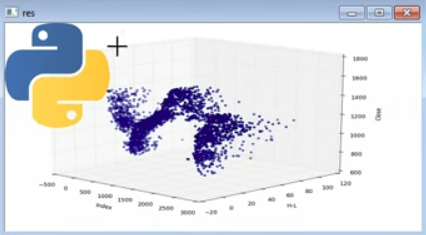

In [1]:
# next: https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/